# <center>Підготовка та аналіз даних</center>
# <center>Лабораторна робота №6</center>
<br>
<center>ФБ-22 Дажук Павло</center>

### <i>Хід виконання<i>

In [19]:
import numpy as np
import matplotlib.pyplot as plt

#### Завдання 1 

<b>1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу результатів.</b>

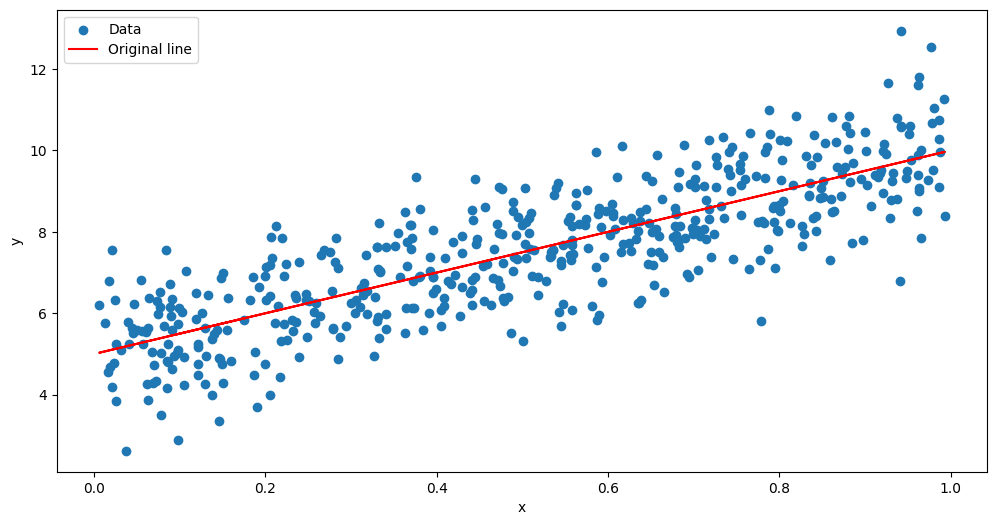

In [20]:
k = 5
b = 5
n = 500

x = np.random.rand(n)
y = k * x + b + np.random.randn(n)

plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Data')
plt.plot(x, k * x + b, color='r', label='Original line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<b>2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k та b.</b>

In [21]:
def least_squares(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    k_ls = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    
    b_ls = y_mean - k_ls * x_mean
    
    return k_ls, b_ls

k_least_squares, b_least_squares = least_squares(x, y)
print(f"Least Squares Method: k = {k_least_squares}, b = {b_least_squares}")

Least Squares Method: k = 5.020773315555821, b = 4.970686293074026


<b>3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).</b>

In [22]:
k_polyfit, b_polyfit = np.polyfit(x, y, 1)

print(f"Original data: k = {k}, b = {b}")
print(f"Least Squares Method: k = {k_least_squares}, b = {b_least_squares}")
print(f"np.polyfit: k = {k_polyfit}, b = {b_polyfit}")

Original data: k = 5, b = 5
Least Squares Method: k = 5.020773315555821, b = 4.970686293074026
np.polyfit: k = 5.0207733155558145, b = 4.970686293074026


<b>4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.</b>

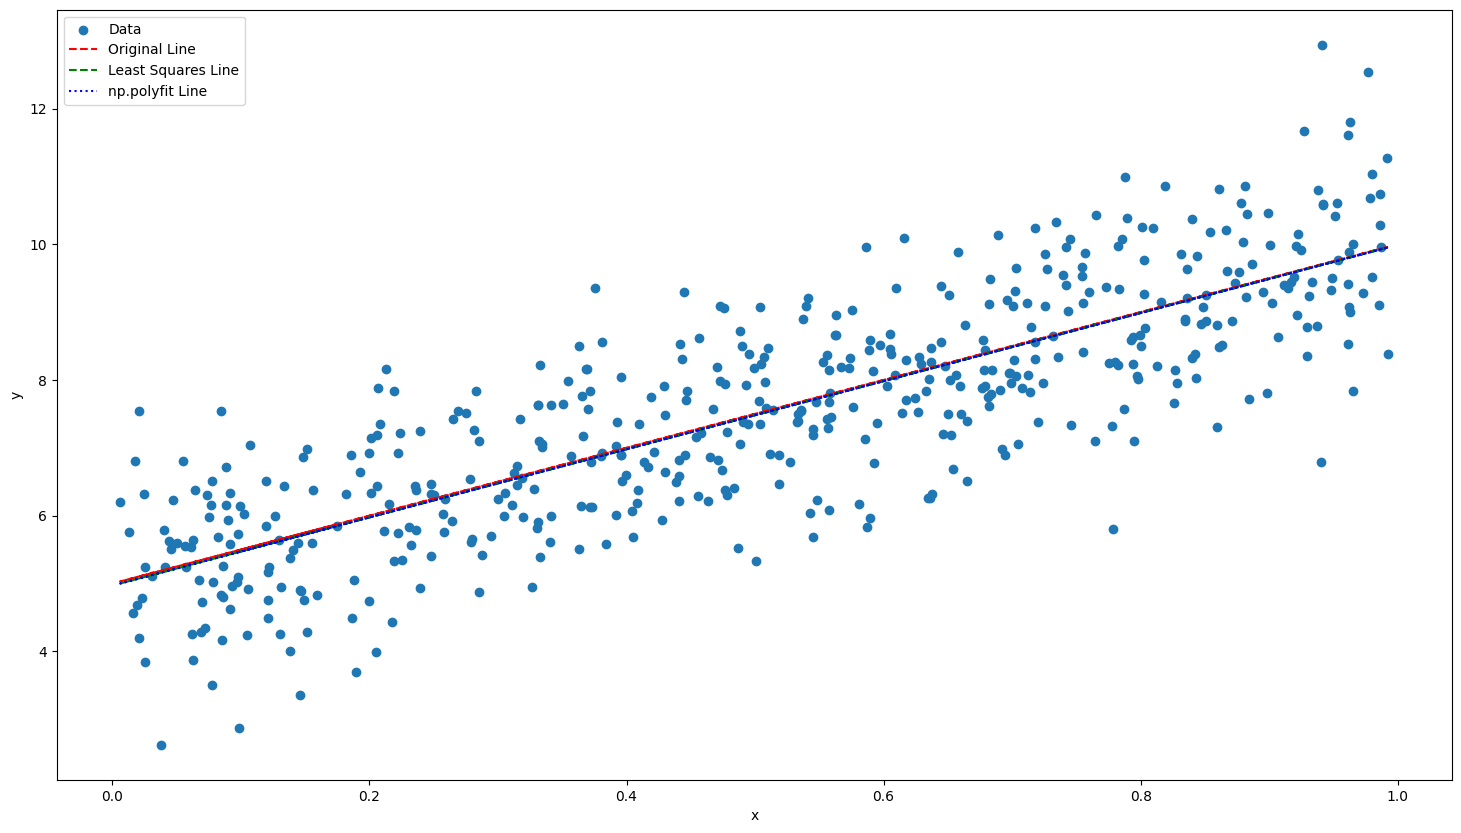

In [23]:
plt.figure(figsize=(18, 10))
plt.scatter(x, y, label='Data')
plt.plot(x, k * x + b, color='r', linestyle='--', label='Original Line')
plt.plot(x, k_least_squares * x + b_least_squares, color='g', linestyle='--', label='Least Squares Line')
plt.plot(x, k_polyfit * x + b_polyfit, color='b', linestyle=':', label='np.polyfit Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Завдання 2

<b>1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter.</b>

In [24]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000):
    k, b = 0, 0
    for i in range(n_iter):
        y_pred = k * x + b
        error = y - y_pred
        k_grad = -2 * np.mean(x * error)
        b_grad = -2 * np.mean(error)
        k -= learning_rate * k_grad
        b -= learning_rate * b_grad
    return k, b

k_gradient_descent, b_gradient_descent = gradient_descent(x, y)
print(f"Gradient Descent: k = {k_gradient_descent}, b = {b_gradient_descent}")

Gradient Descent: k = 4.506178984005161, b = 5.249268839619521


<b>2. Додайте отриману лінію регресії на загальний графік.</b>

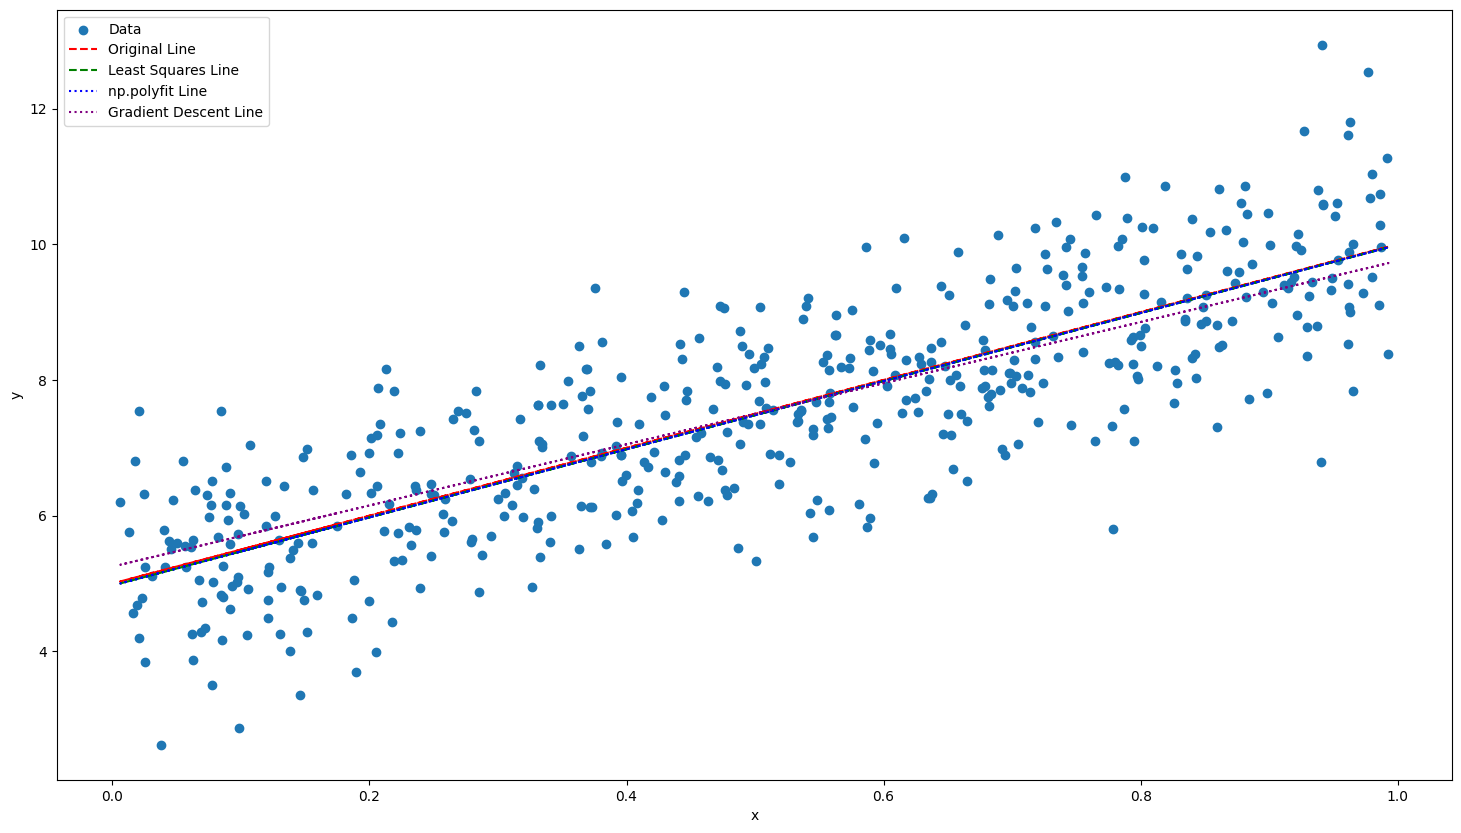

In [25]:
plt.figure(figsize=(18, 10))
plt.scatter(x, y, label='Data')
plt.plot(x, k * x + b, color='r', linestyle='--', label='Original Line')
plt.plot(x, k_least_squares * x + b_least_squares, color='g', linestyle='--', label='Least Squares Line')
plt.plot(x, k_polyfit * x + b_polyfit, color='b', linestyle=':', label='np.polyfit Line')
plt.plot(x, k_gradient_descent * x + b_gradient_descent, color='purple', linestyle=':', label='Gradient Descent Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<b>3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки.</b>

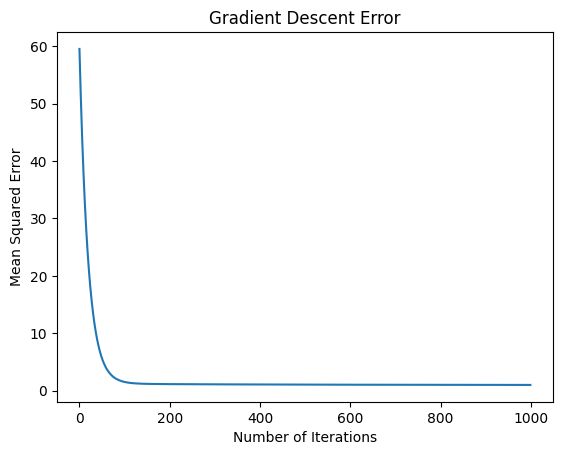

In [26]:
def gradient_descent_with_error(x, y, learning_rate=0.01, n_iter=1000):
    k, b = 0, 0
    errors = []
    for i in range(n_iter):
        y_pred = k * x + b
        error = y - y_pred
        errors.append(np.mean(error**2))
        k_grad =  -2 * np.mean(x * error)
        b_grad = -2 * np.mean(error)
        k -= learning_rate * k_grad
        b -= learning_rate * b_grad
    return errors

errors = gradient_descent_with_error(x, y)
plt.plot(errors)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Descent Error')
plt.show()

<b>4. Порівняйте отримані результати з результатами попереднього завдання.</b>

In [27]:
print(f"Original data: k = {k}, b = {b}")
print(f"Least Squares Method: k = {k_least_squares}, b = {b_least_squares}")
print(f"np.polyfit: k = {k_polyfit}, b = {b_polyfit}")
print(f"Gradient Descent: k = {k_gradient_descent}, b = {b_gradient_descent}")

Original data: k = 5, b = 5
Least Squares Method: k = 5.020773315555821, b = 4.970686293074026
np.polyfit: k = 5.0207733155558145, b = 4.970686293074026
Gradient Descent: k = 4.506178984005161, b = 5.249268839619521
